<a href="https://colab.research.google.com/github/thzthix/Pytorch_Fundamentals/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another(there can be multiple things as the options).

##1. Make classificaion data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000


#create circles
X,y = make_circles(n_samples, noise = 0.03, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y :\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
 [1 1 1 1 0]


In [ ]:
#Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


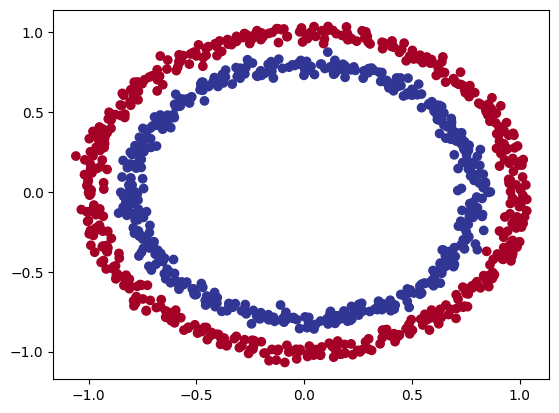

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input ouput shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#View the first sample of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample for X: {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y {y_sample.shape}")

Values for one sample for X: [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X: (2,) and the same for y ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
#Turn data into tensors
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, #0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code will run on accelerator(GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
## Import PyTorch and nn
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of out model class and send it to the target `device`

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
#1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data.
   # self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features and upscales to 5 features
    #self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 45 features from previous layer and ouputs a single feature (same sahpe as y)

    self.two_linear_layers=nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

    #3. Define a forward() method that outlines the forward pass
    def forward (self,x):
      #return self.layer_2(self.layer_1(x)) #x ->layer_1->layer_2 ->output
      return two_linear_layers(x)

#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
#Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-7.6357e-02,  3.6870e-01],
                      [-6.0740e-01,  1.7114e-01],
                      [-6.0789e-01, -1.6302e-04],
                      [ 1.4282e-01,  3.1732e-01],
                      [ 5.5128e-01, -6.2738e-01]])),
             ('0.bias', tensor([ 0.0237,  0.7026, -0.2108, -0.0787,  0.0651])),
             ('1.weight',
              tensor([[-0.1128, -0.4189, -0.0080,  0.0047, -0.3921]])),
             ('1.bias', tensor([0.3297]))])

In [ ]:
#Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples : 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

###2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?
Again...this is problem specific.
For example for regression you might use MAE or MSE (mean absolute error or mean squared error)
For classification you might want binary cross entropy or categorical entropy (cross entropy)

As a reminder, the loss function measures how wrong your models predictions are.
And for optimizers, the most commond and useful are SGD and Adom, however PyTorch has many built in options.

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`
* For different optimizers, see `torch.optim`

In [ ]:
#Setup the loss function
#loss_fn = nn.BCELoss() #BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
#nn.Sequential(
 #   nn.Sigmoid(),
  #  nn.BCELoss()
#)


loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.1)

In [ ]:
#Calculate accuracy - out of 100 samples, that percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred))*100
  return acc

## 3. Train model

Totrain out model, we're going to need to build a training loop with the following steps:
1. Foward pass
2. Calculate the loss
3. Optimize zero grad
4. Loss backward (backpropagation)
5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilites -> prediction labels
Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilites** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
#View the firsgt 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0805],
        [ 0.1382],
        [-0.0706],
        [ 0.1232],
        [-0.0702]])

In [ ]:
#Use the sigmoid function on out model logits to turn them into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5201],
        [0.5345],
        [0.4824],
        [0.5308],
        [0.4825]])

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs`>=0.5, `y=1` (class 1)
* `y_pred_probs`<0, `y=0`(class 0)

In [ ]:
#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full (logits ->pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra demension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 0.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the numper of epochs
epochs = 1000

#Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build training and evaluation loop

for epoch in range(epochs):
  ###Training
  model_0.train()

  #1. Forwad pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> pred probs -> pred labels

  #2. Calculateloss/ accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), #nn.BCELoss expects prediction probabilites as input
  #                              y_train)
  loss = loss_fn(y_logits, #nn.BCWWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backpropagation)
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)


  #Print out what's happenin'
  if epoch % 10 ==0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss:{test_loss:.5f}, Test acc : {test_acc:.2f}%")

Epoch : 0 | Loss: 0.69336, Acc: 50.75% | Test loss:0.69764, Test acc : 46.50%
Epoch : 10 | Loss: 0.69331, Acc: 50.88% | Test loss:0.69740, Test acc : 46.00%
Epoch : 20 | Loss: 0.69326, Acc: 51.25% | Test loss:0.69717, Test acc : 46.00%
Epoch : 30 | Loss: 0.69322, Acc: 51.38% | Test loss:0.69697, Test acc : 46.00%
Epoch : 40 | Loss: 0.69319, Acc: 51.38% | Test loss:0.69679, Test acc : 45.00%
Epoch : 50 | Loss: 0.69316, Acc: 51.50% | Test loss:0.69663, Test acc : 45.50%
Epoch : 60 | Loss: 0.69313, Acc: 51.38% | Test loss:0.69648, Test acc : 45.50%
Epoch : 70 | Loss: 0.69311, Acc: 51.50% | Test loss:0.69634, Test acc : 45.50%
Epoch : 80 | Loss: 0.69310, Acc: 51.50% | Test loss:0.69622, Test acc : 45.50%
Epoch : 90 | Loss: 0.69308, Acc: 51.38% | Test loss:0.69610, Test acc : 45.50%
Epoch : 100 | Loss: 0.69307, Acc: 51.38% | Test loss:0.69600, Test acc : 45.50%
Epoch : 110 | Loss: 0.69306, Acc: 51.38% | Test loss:0.69590, Test acc : 45.50%
Epoch : 120 | Loss: 0.69305, Acc: 51.25% | Test los

##4. Make predictions and evalutate the model

From the metrices it looks like our mode ins't learning anything...
So to inspect it let's make some predictions and make them visual!
In other words, "Visualize, visualize, visualize!!"

To so so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib import Path

#Down load helper functions from Learn Pytorch repo (if it;s not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

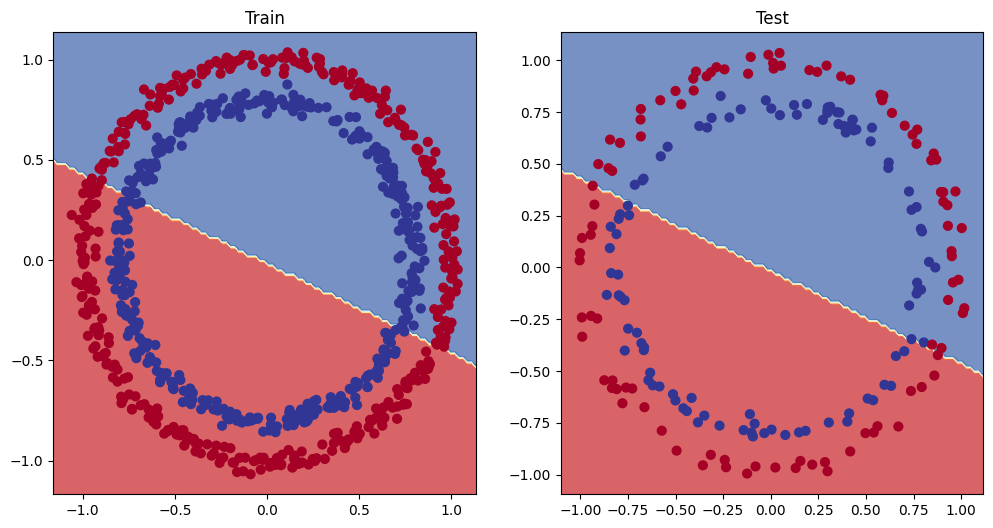

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

##5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred ad **hyperparameters**.

Let's try and imporve our model by:
* Adding more hidden units: 5->10
* Increase the number of layers: 2->3
* Increase the number of epochs: 100 ->1000

In [ ]:
class CircleModelV1 (nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)
  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(x)
    # z = self.layer_3(x)
    return self.layer_3(self.layer_2(self.layer_1(x))) #This way of writing operations leverages speeds ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#Create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)


In [ ]:
#Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Trainig loop
for epoch in range(epochs):
  model_1.train()
  pred_logits = model_1(X_train).squeeze()
  pred_labels = torch.round(torch.sigmoid(pred_logits))

  loss = loss_fn(pred_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=pred_labels)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing loop
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_labels = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_labels)
  if epoch % 100==0:
    print(f"\nepoch:{epoch} | loss:{loss:.5f} Acurrancy: {acc:.2f}% | Test loss = {test_loss:.5f} Test Accurancy: {test_acc:.2f}%")







epoch:0 | loss:0.69396 Acurrancy: 50.88% | Test loss = 0.69261 Test Accurancy: 51.00%

epoch:100 | loss:0.69305 Acurrancy: 50.38% | Test loss = 0.69379 Test Accurancy: 48.00%

epoch:200 | loss:0.69299 Acurrancy: 51.12% | Test loss = 0.69437 Test Accurancy: 46.00%

epoch:300 | loss:0.69298 Acurrancy: 51.62% | Test loss = 0.69458 Test Accurancy: 45.00%

epoch:400 | loss:0.69298 Acurrancy: 51.12% | Test loss = 0.69465 Test Accurancy: 46.00%

epoch:500 | loss:0.69298 Acurrancy: 51.00% | Test loss = 0.69467 Test Accurancy: 46.00%

epoch:600 | loss:0.69298 Acurrancy: 51.00% | Test loss = 0.69468 Test Accurancy: 46.00%

epoch:700 | loss:0.69298 Acurrancy: 51.00% | Test loss = 0.69468 Test Accurancy: 46.00%

epoch:800 | loss:0.69298 Acurrancy: 51.00% | Test loss = 0.69468 Test Accurancy: 46.00%

epoch:900 | loss:0.69298 Acurrancy: 51.00% | Test loss = 0.69468 Test Accurancy: 46.00%


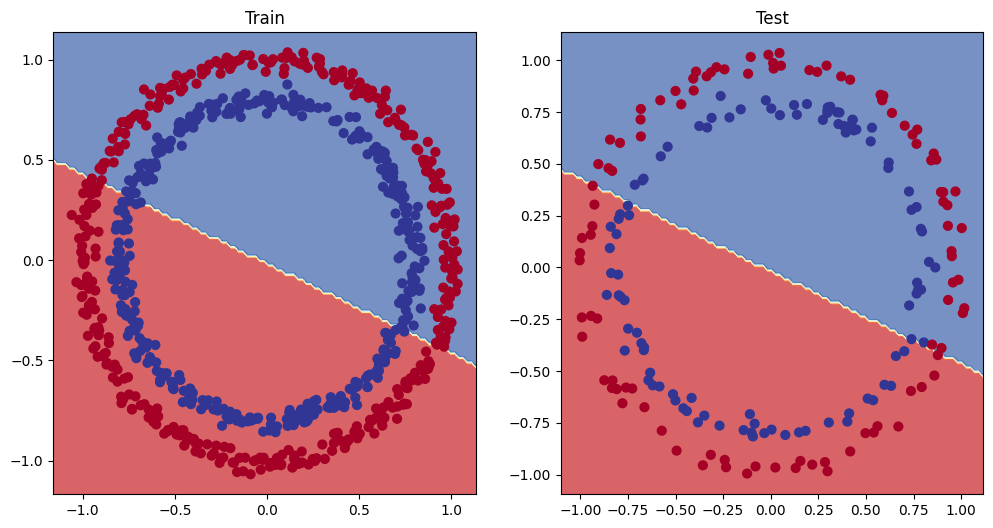

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

###5.1 Preparing data to see if our model can fir a straight line

Ine way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:10], y_regression[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set, 20% for testing
X_regression_train, y_regression_train = X_regression[:train_split], y_regression[:train_split]
X_regression_test, y_regression_test = X_regression[train_split:], y_regression[train_split:]

len(X_regression_train), len(y_regression_train), len(X_regression_test), len(y_regression_test)

(40, 40, 10, 10)

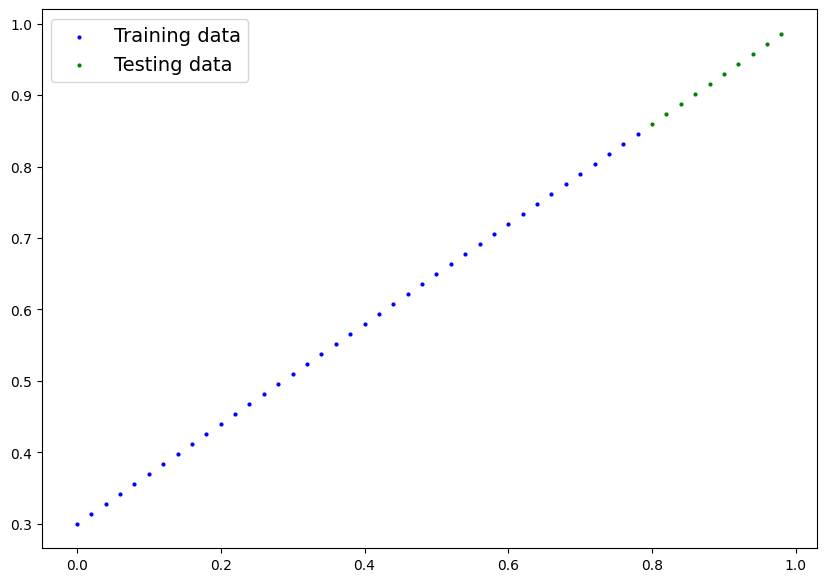

In [ ]:
plot_predictions(train_data =X_regression_train, train_labels =y_regression_train, test_data =X_regression_test,
                test_labels =y_regression_test )

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
#Same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features =10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Loss and optimizer

loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params = model_2.parameters(), lr =0.1)

In [ ]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

#Put the data on the target device
X_regression_train, y_regression_train = X_regression_train.to(device), y_regression_train.to(device)
X_regression_test,y_regression_test = X_regression_test.to(device), y_regression_test.to(device)

#Training
for epoch in range(epochs):
  y_pred = model_2(X_regression_train)
  loss = loss_fn(y_pred, y_regression_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_regression_test)
    test_loss = loss_fn(test_pred, y_regression_test)

  #Print out what's happenin'
  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss : {loss:.5f} | Test loss : {test_loss:.5f}")

Epoch: 0 | Loss : 0.75792 | Test loss : 0.54143
Epoch: 100 | Loss : 0.07424 | Test loss : 0.00881
Epoch: 200 | Loss : 0.07601 | Test loss : 0.01785
Epoch: 300 | Loss : 0.06932 | Test loss : 0.03021
Epoch: 400 | Loss : 0.06326 | Test loss : 0.01104
Epoch: 500 | Loss : 0.05926 | Test loss : 0.01172
Epoch: 600 | Loss : 0.05980 | Test loss : 0.02428
Epoch: 700 | Loss : 0.04829 | Test loss : 0.02345
Epoch: 800 | Loss : 0.04891 | Test loss : 0.00572
Epoch: 900 | Loss : 0.06723 | Test loss : 0.00978


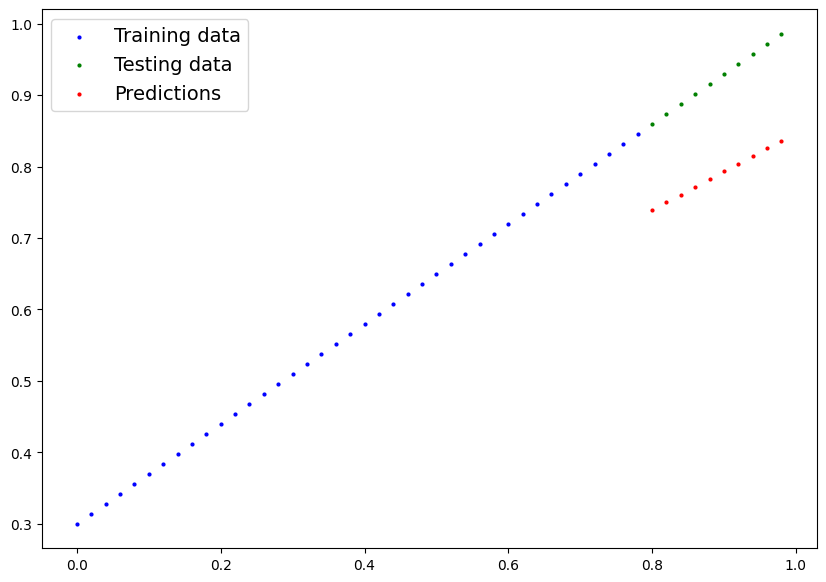

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_regression_test)

plot_predictions(train_data = X_regression_train.cpu(), train_labels = y_regression_train.cpu(),
                 test_data = X_regression_test.cpu(), test_labels = y_regression_test.cpu(),
                 predictions = y_preds.cpu())

##6. The missing piece: none-linearity

"What patterns could you draw if you were given an infinite amount of a staright and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

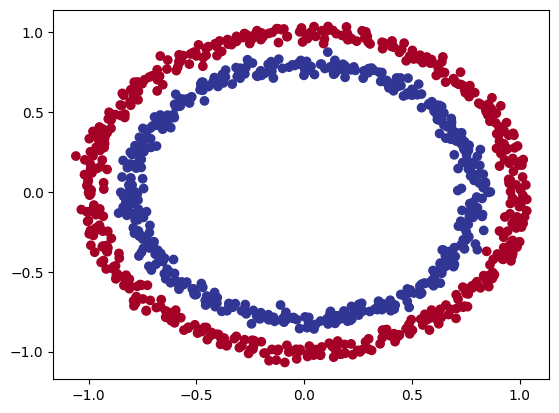

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles (n_samples, noise = 0.03, random_state = 42)

plt.scatter(X[:,0], X[:,1], c= y, cmap=plt.cm.RdYlBu);


In [ ]:
#Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
###6.1 Recreating non-linear data (red and blue circles)

###6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non-straight lines

Aritificial neural networks are a loarge combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [ ]:
#Build a model with non-linear activation functions

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 128)
    self.layer_2 = nn.Linear(in_features = 128, out_features = 128)
    self.layer_3 = nn.Linear(in_features = 128, out_features = 128)
    self.layer_4 = nn.Linear(in_features = 128, out_features = 128)
    self.layer_5 = nn.Linear(in_features = 128, out_features = 128)
    self.layer_6 = nn.Linear(in_features = 128, out_features=1)
    self.relu = nn.ReLU() #relu is a non-linear activation function



  def forward(self, x):
    #Where should we put our non-linear activation functions?


    return self.layer_6(self.relu(self.layer_5(self.relu(self.layer_4(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=128, bias=True)
  (layer_6): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#Loss and optimizer

loss_fn = nn.BCEWithLogitsLoss() # MAE loss with regression data
optimizer = torch.optim.SGD(params = model_3.parameters(), lr =0.1)

### 6.3 Training a model with non-linearity

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  logits = model_3(X_train).squeeze()
  pred_labels = torch.round(torch.sigmoid(logits)) #logits ->prediction probabilites ->prediction labels

  loss = loss_fn(logits, y_train) #BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true = y_train, y_pred = pred_labels)
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_labels = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_labels)
  if epoch % 100 ==0:
    print(f"Epoch : {epoch} Loss: {loss:.4f} Accuracy: {acc:.2f}%| Test Loss : {test_loss:.4f} Test Accuracy: {test_acc:.2f}%")


Epoch : 0 Loss: 0.6950 Accuracy: 50.00%| Test Loss : 0.6947 Test Accuracy: 50.00%
Epoch : 100 Loss: 0.6899 Accuracy: 60.88%| Test Loss : 0.6907 Test Accuracy: 62.00%
Epoch : 200 Loss: 0.6846 Accuracy: 69.25%| Test Loss : 0.6866 Test Accuracy: 68.50%
Epoch : 300 Loss: 0.6658 Accuracy: 83.50%| Test Loss : 0.6714 Test Accuracy: 78.50%
Epoch : 400 Loss: 0.5690 Accuracy: 58.75%| Test Loss : 0.6618 Test Accuracy: 50.00%
Epoch : 500 Loss: 0.4213 Accuracy: 72.62%| Test Loss : 0.5024 Test Accuracy: 59.50%
Epoch : 600 Loss: 0.0811 Accuracy: 100.00%| Test Loss : 0.1098 Test Accuracy: 100.00%
Epoch : 700 Loss: 0.0144 Accuracy: 100.00%| Test Loss : 0.0277 Test Accuracy: 100.00%
Epoch : 800 Loss: 0.0070 Accuracy: 100.00%| Test Loss : 0.0160 Test Accuracy: 100.00%
Epoch : 900 Loss: 0.0044 Accuracy: 100.00%| Test Loss : 0.0117 Test Accuracy: 100.00%


###6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
#Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

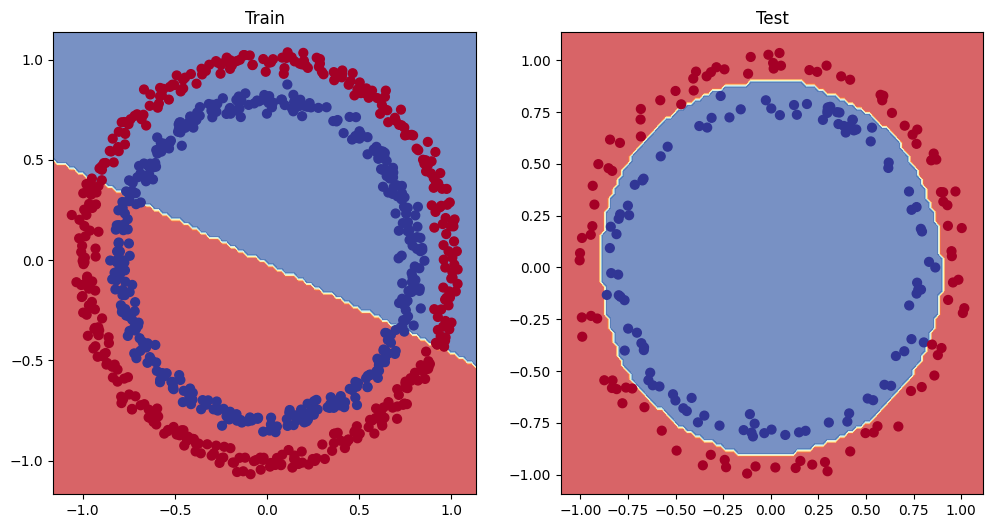

In [ ]:
#Plot decision baounndaries
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) #model_1 = no non-linearity
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) #model_3 = has non-linearity

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [ ]:
#Create a tensor
A = torch.arange (-10,10,1, dtype = torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

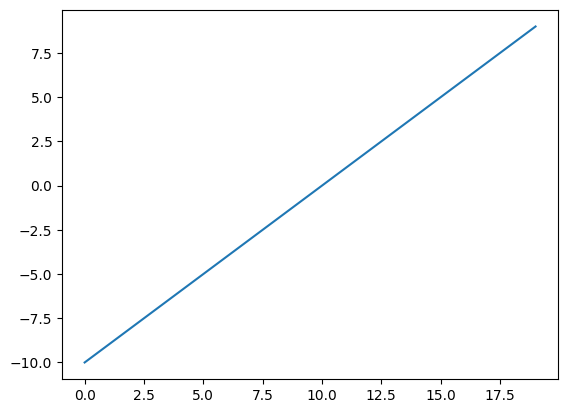

In [ ]:
#Visualize the tensor
plt.plot(A)

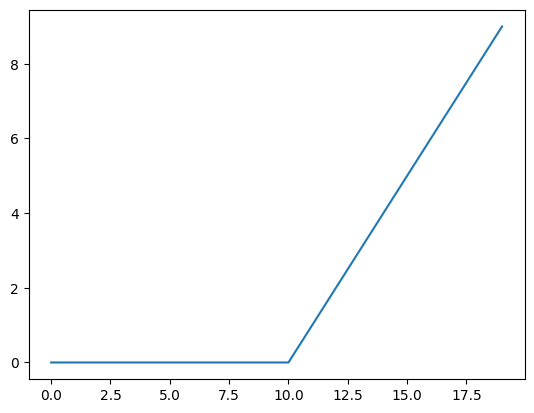

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu (x:torch.Tensor) ->torch.Tensor:
  return torch.maximum(torch.tensor(0), x) #inputs must be tensors
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

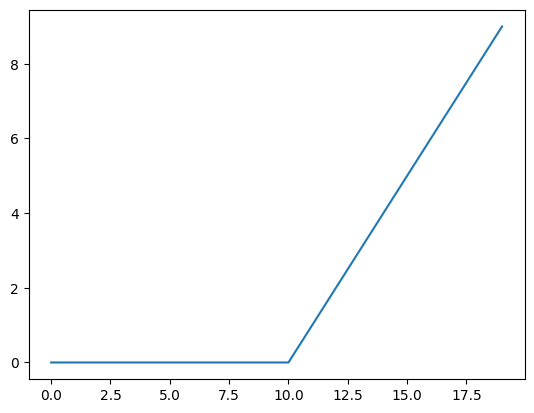

In [ ]:
#Plot ReLU activation function
plt.plot(relu(A))

In [ ]:
#Now let's do the same for Sigmoid

def sigmoid(x):
  return 1 / (1+torch.exp(-x))

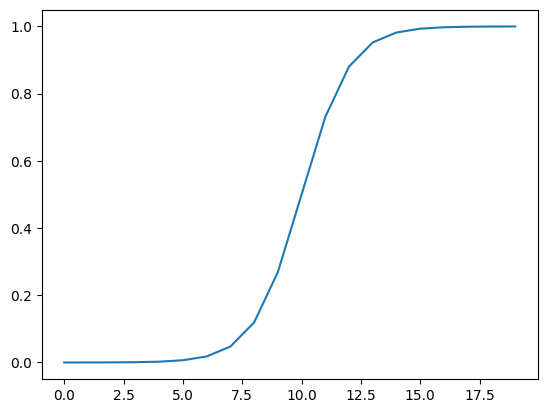

In [ ]:
plt.plot(torch.sigmoid(A))

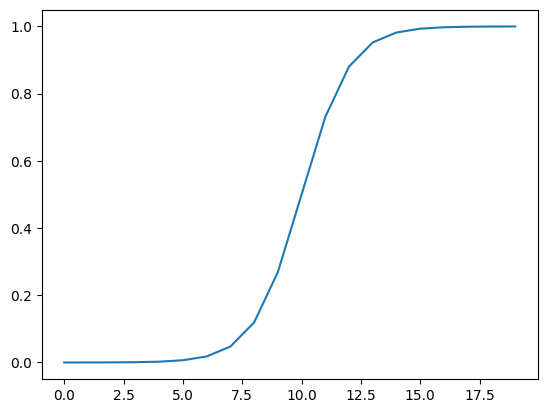

In [ ]:
plt.plot(sigmoid(A))

##8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

###8.1 Creating a toy multi-class dataset

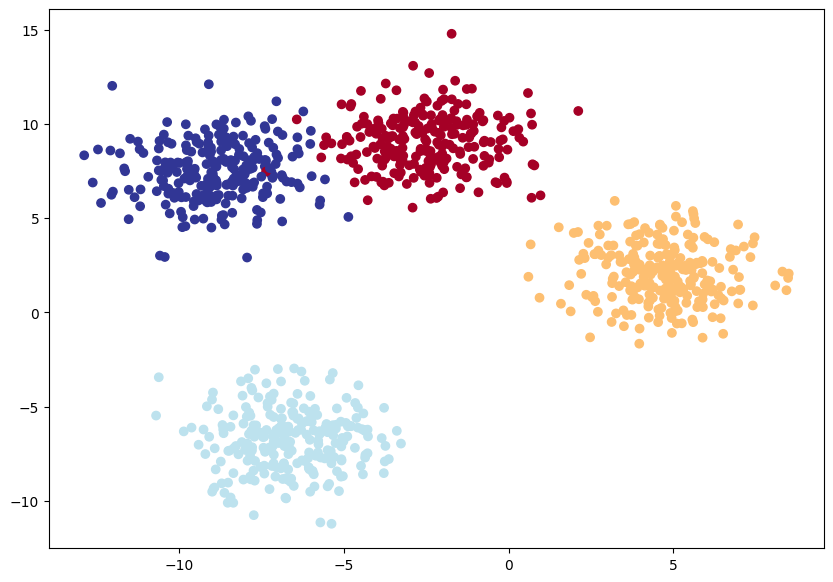

In [ ]:
#Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASS,
                            cluster_std = 1.5, #give the clusters a little shake up
                            random_state = RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

#4, Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c= y_blob, cmap = plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 2):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of ouputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

      Returns:

      Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)

    )
  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)
model_4



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
#Create a loss function for multi-clss clasification loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1) #learning rate is a hypyerparameter you can change

### 8.4 Getting prediction probabilites for a multi-class PyTorch model

In order to evaluate and test our model, we need to convert our model's outputs (logits) to predictions probabilites and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilites)

In [ ]:
#Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
#Convert out model's logit ouputs to prediction probabilites

y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [ ]:
#Convert out model's predicton probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
 next(model_4.parameters()).device

device(type='cpu')

In [ ]:
X_blob_train.device

device(type='cpu')

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
#Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs= 1000

X_blob_train, X_blob_test =   X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_labels = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_labels)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_labels = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_labels)
  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc:{acc:.2f}% | Test Loss :{test_loss: .5f} Test Acc: {test_acc: .2}%")







Epoch: 0 | Loss: 1.15883 Acc:40.38% | Test Loss : 1.07554 Test Acc:  4.8e+01%
Epoch: 100 | Loss: 0.03312 Acc:99.25% | Test Loss : 0.02433 Test Acc:  1e+02%
Epoch: 200 | Loss: 0.02657 Acc:99.25% | Test Loss : 0.01651 Test Acc:  1e+02%
Epoch: 300 | Loss: 0.02503 Acc:99.25% | Test Loss : 0.01440 Test Acc:  1e+02%
Epoch: 400 | Loss: 0.02427 Acc:99.25% | Test Loss : 0.01335 Test Acc:  1e+02%
Epoch: 500 | Loss: 0.02377 Acc:99.25% | Test Loss : 0.01269 Test Acc:  1e+02%
Epoch: 600 | Loss: 0.02339 Acc:99.25% | Test Loss : 0.01218 Test Acc:  1e+02%
Epoch: 700 | Loss: 0.02307 Acc:99.25% | Test Loss : 0.01179 Test Acc:  1e+02%
Epoch: 800 | Loss: 0.02279 Acc:99.25% | Test Loss : 0.01147 Test Acc:  1e+02%
Epoch: 900 | Loss: 0.02253 Acc:99.25% | Test Loss : 0.01120 Test Acc:  1e+02%


###8.6 Making and evalutating predictions with a PyTorch multi-class model

In [ ]:
#Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
#View the first 10 predictions
y_logits[:10]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8975, -12.3324,  -8.4675],
        [ -2.7723, -11.1927,  -7.4741,   6.3901],
        [ -4.3608,  -4.5814,   4.6891,  -3.5910],
        [  5.8017,  -6.8308,  -9.7351,  -4.1265],
        [ -6.3789,  -6.9228,   6.6639,  -5.5251],
        [  6.2822,  -5.5357, -10.3558,  -5.4748]])

In [ ]:
#Go from logits -> Prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.6515e-06, 1.0000e+00, 6.5754e-10, 2.1385e-10],
        [5.9742e-04, 4.0741e-07, 9.7747e-06, 9.9939e-01],
        [3.1371e-05, 2.1165e-05, 9.9989e-01, 6.1552e-05],
        [1.3729e-05, 9.9998e-01, 1.1796e-06, 3.5901e-07],
        [9.9992e-01, 8.3726e-05, 6.6887e-09, 3.1906e-07],
        [1.0490e-04, 2.3112e-08, 9.5245e-07, 9.9989e-01],
        [1.1735e-04, 9.4120e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2638e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0863e-06],
        [9.9998e-01, 7.3709e-06, 5.9454e-08, 7.8339e-06]])

In [ ]:
#Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

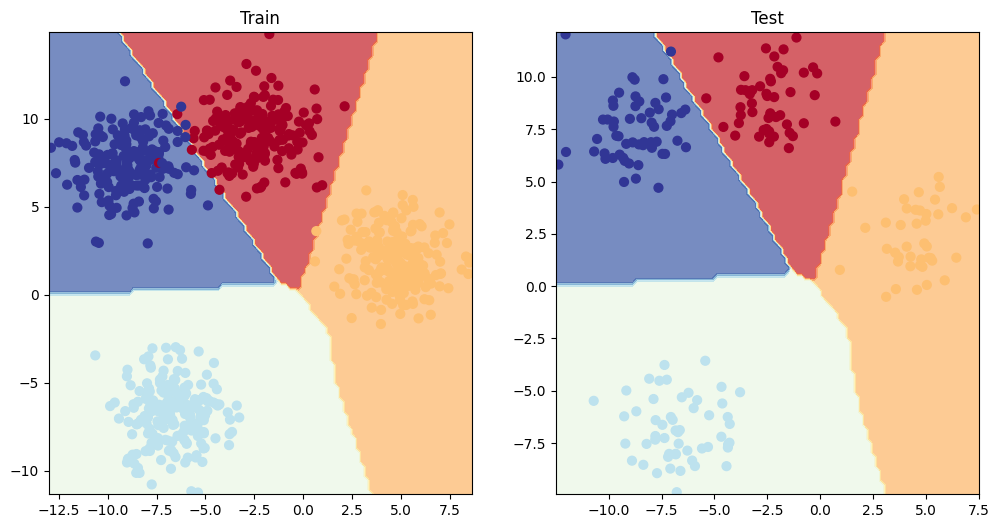

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

##9. A few more classification Metrics..(to evaulate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification matrix

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

#setup metric
torchmetrics_accuracy = Accuracy(task="multiclass",num_classes=NUM_CLASS).to(device)

#Calculate Accuracy
torchmetrics_accuracy(y_preds,y_blob_test)

tensor(0.9950)